In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPool2D, Flatten

/home/sahil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('training.csv')
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [3]:
df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [4]:
df = df.dropna()

In [5]:
df.shape

(2140, 31)

In [6]:
X = np.vstack(df['Image'].values) / 255

In [7]:
X

array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.2745098 , 0.29411765,
        0.35294118],
       [0.85882353, 0.84313725, 0.8       , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.56470588, 0.55686275, 0.62352941, ..., 0.30588235, 0.30588235,
        0.30196078],
       ...,
       [0.12156863, 0.15686275, 0.18431373, ..., 0.15294118, 0.2       ,
        0.29411765],
       [0.02745098, 0.00392157, 0.01960784, ..., 0.70196078, 0.69411765,
        0.22352941],
       [0.26666667, 0.0745098 , 0.0745098 , ..., 0.49019608, 0.48627451,
        0.46666667]])

In [8]:
y = df[df.columns[:-1]].values

In [9]:
y

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [68.43086625, 38.65197512, 28.89585706, ..., 79.04312978,
        47.17673868, 89.54452244],
       [64.15217959, 30.69159184, 27.00089796, ..., 79.30142857,
        58.61108571, 80.35554286],
       [66.6837551 , 34.48342857, 30.7844898 , ..., 75.96359236,
        52.92337132, 82.66106175]])

In [10]:
X = X.reshape(-1,96,96, 1)

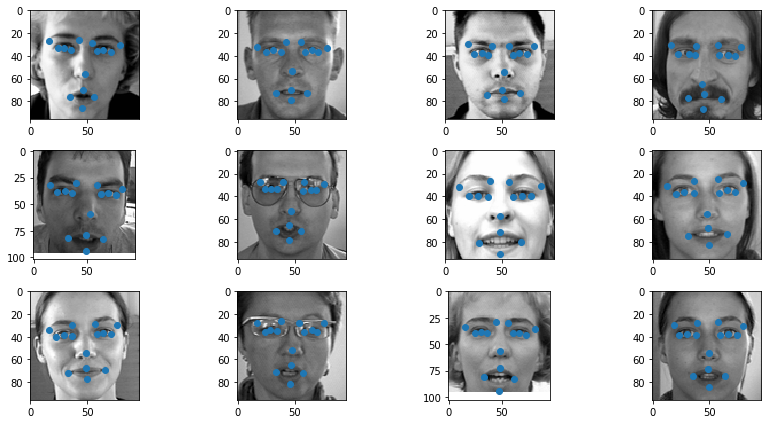

In [23]:
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(X[i, :, :, 0], cmap="gray")
    plt.scatter(y[i, range(0, 30, 2)], y[i, range(1, 30, 2)], marker='o')

plt.tight_layout()
plt.show()

# CREATING MODEL

In [12]:
model = Sequential()

model.add(Conv2D(16, 5, kernel_initializer="he_normal", input_shape=(96, 96, 1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, 3))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(90))
model.add(Activation("relu"))

model.add(Dense(30))
model.compile(optimizer='adam', loss='mse')

In [13]:
hist = model.fit(X, y, epochs=300, validation_split=0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/300
1712/1712 [==============================] - 51s 30ms/step - loss: 470.4056 - val_loss: 100.5308
Epoch 2/300
1712/1712 [==============================] - 49s 29ms/step - loss: 95.3790 - val_loss: 61.0019
Epoch 3/300
1712/1712 [==============================] - 47s 28ms/step - loss: 37.9235 - val_loss: 58.1774
Epoch 4/300
1712/1712 [==============================] - 48s 28ms/step - loss: 25.5938 - val_loss: 46.2598
Epoch 5/300
1712/1712 [==============================] - 47s 28ms/step - loss: 21.4644 - val_loss: 55.4825
Epoch 6/300
1712/1712 [==============================] - 47s 28ms/step - loss: 15.7075 - val_loss: 20.4545
Epoch 7/300
1712/1712 [==============================] - 47s 28ms/step - loss: 13.4540 - val_loss: 19.0204
Epoch 8/300
1712/1712 [==============================] - 48s 28ms/step - loss: 11.7704 - val_loss: 19.1017
Epoch 9/300
1712/1712 [==============================] - 48s 28ms/step - loss: 10.4836 - val_lo

1712/1712 [==============================] - 47s 28ms/step - loss: 2.0698 - val_loss: 8.9334
Epoch 78/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.3076 - val_loss: 8.7212
Epoch 79/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.6720 - val_loss: 12.0610
Epoch 80/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.4825 - val_loss: 10.4662
Epoch 81/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.7085 - val_loss: 9.1925
Epoch 82/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.6765 - val_loss: 9.6499
Epoch 83/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.5846 - val_loss: 8.4850
Epoch 84/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.2494 - val_loss: 8.8926
Epoch 85/300
1712/1712 [==============================] - 48s 28ms/step - loss: 2.3023 - val_loss: 8.6040
Epoch 86/300
1712/1712 [==============================] -

Epoch 154/300
1712/1712 [==============================] - 71s 41ms/step - loss: 1.1745 - val_loss: 7.6592
Epoch 155/300
1712/1712 [==============================] - 74s 43ms/step - loss: 1.1422 - val_loss: 7.9130
Epoch 156/300
1712/1712 [==============================] - 74s 43ms/step - loss: 1.2300 - val_loss: 7.8608
Epoch 157/300
1712/1712 [==============================] - 73s 43ms/step - loss: 1.2109 - val_loss: 8.6327
Epoch 158/300
1712/1712 [==============================] - 71s 41ms/step - loss: 1.8792 - val_loss: 8.3180
Epoch 159/300
1712/1712 [==============================] - 74s 43ms/step - loss: 1.2991 - val_loss: 7.9107
Epoch 160/300
1712/1712 [==============================] - 71s 42ms/step - loss: 1.1407 - val_loss: 8.0837
Epoch 161/300
1712/1712 [==============================] - 69s 40ms/step - loss: 1.5348 - val_loss: 7.7423
Epoch 162/300
1712/1712 [==============================] - 70s 41ms/step - loss: 1.2586 - val_loss: 7.8101
Epoch 163/300
1712/1712 [============

1712/1712 [==============================] - 48s 28ms/step - loss: 0.9309 - val_loss: 7.9179
Epoch 231/300
1712/1712 [==============================] - 48s 28ms/step - loss: 0.7097 - val_loss: 7.8592
Epoch 232/300
1712/1712 [==============================] - 48s 28ms/step - loss: 0.7595 - val_loss: 7.5272
Epoch 233/300
1712/1712 [==============================] - 48s 28ms/step - loss: 0.9501 - val_loss: 7.5880
Epoch 234/300
1712/1712 [==============================] - 49s 28ms/step - loss: 0.8391 - val_loss: 8.2555
Epoch 235/300
1712/1712 [==============================] - 48s 28ms/step - loss: 1.2177 - val_loss: 7.7919
Epoch 236/300
1712/1712 [==============================] - 48s 28ms/step - loss: 0.9094 - val_loss: 7.5587
Epoch 237/300
1712/1712 [==============================] - 48s 28ms/step - loss: 0.7846 - val_loss: 7.5199
Epoch 238/300
1712/1712 [==============================] - 48s 28ms/step - loss: 0.6755 - val_loss: 7.7456
Epoch 239/300
1712/1712 [==========================

In [14]:
model.save('facial_keypoints.h5')

In [15]:
X_test= pd.read_csv('test.csv')

In [16]:
X_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [17]:
X_test['Image'] = X_test['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [18]:
X_test = np.vstack(X_test['Image'].values) / 255

In [19]:
X_test = X_test.reshape(-1,96,96, 1)

In [20]:
y_pred = model.predict(X_test)

# PLOTTING RESULTS

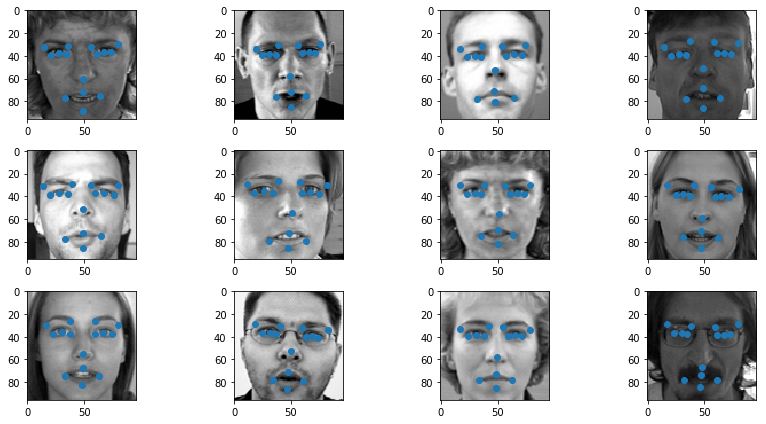

In [22]:
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(X_test[i, :, :, 0], cmap="gray")
    plt.scatter(y_pred[i, range(0, 30, 2)], y_pred[i, range(1, 30, 2)], marker='o')

plt.tight_layout()
plt.show()